In [163]:
import pandas as pd
import os
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
from matplotlib.colors import LogNorm
import seaborn as sns
import matplotlib.pyplot as plt

In [164]:
# Chemin vers notre fichier de training
path = "sat.trn"

In [165]:
# Dataframe
df = pd.read_csv(path, sep = "\s+", header=None)

In [166]:
#Nous allons maintenant extraire nos données et les placer dans un tableau
df.columns = ['A1','A2','A3','A4','B1','B2','B3','B4','C1','C2','C3','C4','D1','D2','D3','D4','E1','E2','E3','E4','F1','F2','F3','F4','G1','G2','G3','G4','H1','H2','H3','H4','I1','I2','I3','I4','Class']
df.head(3)


,A1,A2,A3,A4,B1,B2,B3,B4,C1,C2,...,G4,H1,H2,H3,H4,I1,I2,I3,I4,Class
0,92,115,120,94,84,102,106,79,84,102,...,104,88,121,128,100,84,107,113,87,3
1,84,102,106,79,84,102,102,83,80,102,...,100,84,107,113,87,84,99,104,79,3
2,84,102,102,83,80,102,102,79,84,94,...,87,84,99,104,79,84,99,104,79,3


In [167]:
# Concrétisation de la classe : Traduction en type de sol
soil = {1 : "Terre rouge", 2 : "Champ de coton", 3 : "Sol gris", 4 : "Sol gris humide", 5 : "Sol avec de la végétation", 7 : "Sol gris très humide"}
df["soil"] = df["Class"]
df["soil"] = df.Class.map(soil)
df.head(3)

,A1,A2,A3,A4,B1,B2,B3,B4,C1,C2,...,H1,H2,H3,H4,I1,I2,I3,I4,Class,soil
0,92,115,120,94,84,102,106,79,84,102,...,88,121,128,100,84,107,113,87,3,Sol gris
1,84,102,106,79,84,102,102,83,80,102,...,84,107,113,87,84,99,104,79,3,Sol gris
2,84,102,102,83,80,102,102,79,84,94,...,84,99,104,79,84,99,104,79,3,Sol gris


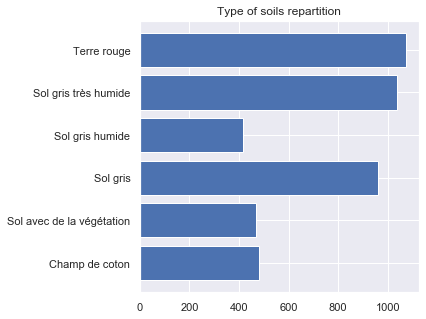

In [168]:
# on peut vérifier le nombre d'occurence de chaque type de sol dans nos données
group_by = df.groupby(['soil']).size().reset_index(name='occurences')
sol = group_by['soil']
count_by_type = group_by['occurences']
abscisse = np.arange(len(sol))
plt.figure(figsize=(5,5))
plt.barh(y_pos, count_by_type)
plt.yticks(abscisse, sol)
plt.title('Type of soils repartition')
plt.show()

In [169]:
# On ôte les résultats à trouver
cl_y = "Class"
cl_y_type = "soil"
X = df.drop({cl_y, cl_y_type}, axis="columns")
Y = df[cl_y]

In [172]:
# Séparons le dataset en 70/30
Y
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3 )
x_train, x_validation, y_train, y_validation = train_test_split(x_train, y_train, test_size=0.05)
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test  = scaler.transform(x_test)
x_train.shape, x_validation.shape, y_train.shape, y_validation.shape, x_test.shape, y_test.shape

((2948, 36), (156, 36), (2948,), (156,), (1331, 36), (1331,))

In [173]:
#RANDOM FOREST
hyper = {"n_estimators": 30,
                   "n_jobs": -1}

algo1 = RandomForestRegressor(**hyper)
modele1 = algo1.fit(x_train, y_train)
modele1.score(x_test, y_test)

0.8782527943170285

In [174]:
#SUPPORT VECTOR REGRESSION
algo2 = svm.SVR(kernel='linear')
modele2 = svr.fit(x_train, y_train)
modele2.score(x_test, y_test)

0.6846978788313385

In [175]:
#GAUSSIAN NAIVE BAYES
algo3 = GaussianNB()
modele3 = algo3.fit(x_train, y_train)
modele3.score(x_test, y_test)

0.8136739293764087

In [176]:
#DECISION TREE CLASSIFIER
algo4 = DecisionTreeClassifier()
modele4= algo4.fit(x_train, y_train)
modele4.score(x_test, y_test)

0.8264462809917356

[0.0064054  0.01432225 0.00532617 0.00725551 0.0209694  0.01556253
 0.00301938 0.0054853  0.02523182 0.01701802 0.00507451 0.00590666
 0.00383958 0.01088259 0.01250355 0.00694706 0.01464822 0.02195202
 0.00474465 0.54454058 0.07128135 0.02800885 0.00582567 0.0069751
 0.0069004  0.01185032 0.01150717 0.00670764 0.01833794 0.00836586
 0.00373577 0.00321612 0.03820629 0.01763317 0.0060627  0.00375045]


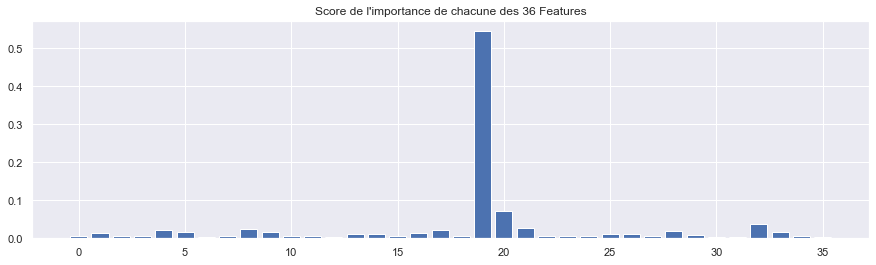

In [177]:
# Voyons quelle feature a la plus grande importance dans le dataset
print(modele.feature_importances_)
plt.bar(range(len(modele.feature_importances_)), modele.feature_importances_)
plt.title("Score de l'importance de chacune des 36 Features")
plt.show()